In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [4]:
# import the csv file: 'Chinese Thermal Comfort Dataset Heating Season_tsv.csv' in the current folder
df = pd.read_csv('Chinese Thermal Comfort Dataset Heating Season_tcv.csv')
df.head()

,ID,A1.Code,A2.Date,A3.Data Contributor,A4.Season,A5.City,A6.Climate Zone,B1.Building Type,B2.Building Function,B3.Floors,...,F5.PPD,t_out_realtime,t_out_daily,t_out_monthly,t_out_7,t_out_15,G5.Mean Daily Outdoor Relative Humidity (%),G6.Mean Daily Outdoor Air Velocity (m/s),latitude,t_out
0,1,DLUT1st0172,1/30/19 10:35,Dalian University of Technology,Winter Season,HebeiProvinceHandanCity,Cold zone,Residential,Bedroom,1.0,...,12.01,NaN,-2.9,0.4,1.2,1.0,NaN,NaN,36.62,-7.28
1,2,DLUT1st0173,1/30/19 10:42,Dalian University of Technology,Winter Season,HebeiProvinceHandanCity,Cold zone,Residential,Bedroom,1.0,...,5.19,NaN,-2.9,0.4,1.2,1.0,NaN,NaN,36.62,-7.28
2,3,DLUT1st0174,1/30/19 10:45,Dalian University of Technology,Winter Season,HebeiProvinceHandanCity,Cold zone,Residential,Bedroom,1.0,...,14.14,NaN,-2.9,0.4,1.2,1.0,NaN,NaN,36.62,-7.28
3,4,DLUT1st0175,1/30/19 10:47,Dalian University of Technology,Winter Season,HebeiProvinceHandanCity,Cold zone,Residential,Bedroom,1.0,...,7.78,NaN,-2.9,0.4,1.2,1.0,NaN,NaN,36.62,-7.28
4,5,DLUT1st0176,1/31/19 20:20,Dalian University of Technology,Winter Season,HebeiProvinceHandanCity,Cold zone,Residential,Bedroom,1.0,...,19.45,NaN,0.6,0.4,0.5,0.2,NaN,NaN,36.62,-7.28


# Comfort vote rate

In [8]:
# create a new dataframe grouped by city, store number of records as a column, calculate the mean of t_op, tsv, latitude
df_heating_city = df.groupby('A5.City').agg(
    records=('A5.City', 'size'),
    t_op=('t_op', 'mean'),
    tsv=('tsv', 'mean'),
    clo=('clo', 'mean'),
    latitude=('latitude', 'mean'),
    t_out=('t_out', 'mean')
).reset_index()

In [18]:
df_heating_city = df_heating_city.copy()
# Apply the function to each group of df_heating grouped by 'A5.City'
grouped_results = df.groupby('A5.City').apply(regression_op_a)
results_df = pd.DataFrame(grouped_results.tolist(), index=grouped_results.index, columns=['slope', 'intercept', 'temp_n', 'temp_up', 'temp_low'])
df_heating_city = df_heating_city.merge(results_df, left_on='A5.City', right_index=True, how='left')

## Griffith method

In [19]:
df_heating_city['temp_n_grif'] = df_heating_city['t_op'] - df_heating_city['tsv']/0.4

In [20]:
df_heating_city

,A5.City,records,t_op,tsv,clo,latitude,t_out,slope_x,intercept_x,temp_n_x,...,slope_y,intercept_y,temp_n_y,temp_up_y,temp_low_y,slope,intercept,temp_n,temp_up,temp_low
0,BaotouCity,303,19.277228,0.016502,0.341782,40.65,-18.00,0.921921,19.262015,19.262015,...,0.058187,-1.105179,18.993630,33.601747,4.385513,0.058187,-1.105179,18.993630,33.601747,4.385513
1,Beijing,327,22.216820,-0.073394,1.074098,39.90,-10.05,0.764204,22.272908,22.272908,...,0.125231,-2.855620,22.802894,29.590374,16.015415,0.125231,-2.855620,22.802894,29.590374,16.015415
2,FujianProvinceFuzhouCity,7,18.100000,-0.714286,0.351429,26.08,4.59,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,FujianProvinceNanpingCity,4,17.900000,0.000000,0.417500,26.64,2.00,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,FujianProvinceZhenjiangCity,2,22.900000,-0.500000,0.305000,32.21,3.00,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,GuangdongProvinceGuangzhouCity,997,23.876128,-0.013039,0.859910,23.13,4.98,0.141928,23.877979,23.877979,...,0.096541,-2.318054,24.011192,32.815779,15.206605,0.096541,-2.318054,24.011192,32.815779,15.206605
6,HainanProvinceSanyaCity,5,24.880000,0.600000,0.332000,18.25,13.22,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,HebeiProvinceHandanCity,26,19.300000,-0.384615,1.447692,36.62,-7.28,3.959091,20.822727,20.822727,...,0.136763,-3.024134,22.112285,28.327434,15.897135,0.136763,-3.024134,22.112285,28.327434,15.897135
8,HeilongjiangProvinceHarbinCity,3552,22.707995,0.293300,0.923361,45.75,-27.75,1.006677,22.412738,22.412738,...,0.158973,-3.316655,20.863029,26.209855,15.516203,0.158973,-3.316655,20.863029,26.209855,15.516203
9,HenanProvinceJiaozuoCity,888,16.798874,-0.255631,1.188874,35.24,-5.05,2.878154,17.534618,17.534618,...,0.064043,-1.331476,20.790437,34.062825,7.518049,0.064043,-1.331476,20.790437,34.062825,7.518049


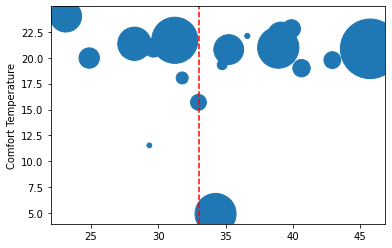

In [22]:
# plot the scatter plot of t_out_monthly and temp_n, data point size is proportional to the number of records
plt.figure(figsize=(6, 4))
x = df_heating_city['latitude']
y = df_heating_city['temp_n']
sizes = df_heating_city['records']  # This will control the size of the points
plt.scatter(x, y, s=sizes)  # Use the 's' parameter to set sizes of points
# draw a vertical line at x=33
plt.axvline(x=33, color='r', linestyle='--')
plt.ylabel('Neutral Temperature')
plt.show()

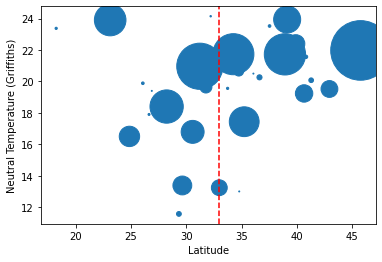

In [27]:
# plot the scatter plot of t_out_monthly and temp_n, data point size is proportional to the number of records
plt.figure(figsize=(6, 4))
x = df_heating_city['latitude']
y = df_heating_city['temp_n_grif']
sizes = df_heating_city['records']  # This will control the size of the points
plt.scatter(x, y, s=sizes)  # Use the 's' parameter to set sizes of points
# draw a vertical line at x=33
plt.axvline(x=33, color='r', linestyle='--')
plt.xlabel('Latitude')
plt.ylabel('Neutral Temperature (Griffiths)')
plt.show()
